### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [50]:
import matplotlib.pyplot as plt
import pandas as pd


In [51]:
# importa el tsv y guárdalo en un dataframe
df = pd.read_csv('/Users/carlosoliver/Desktop/BOOTCAMP/DataScience-Mar2024/3-Machine_Learning/2-No_Supervisado/3-Clustering/Practica/data/drugLibTrain_raw.tsv', sep='\t')

In [52]:
df

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...,...
3102,1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m..."
3103,3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...
3104,1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---
3105,2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...


### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categoricas con pocas categorias (menos de 10)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3107 non-null   int64 
 1   urlDrugName        3107 non-null   object
 2   rating             3107 non-null   int64 
 3   effectiveness      3107 non-null   object
 4   sideEffects        3107 non-null   object
 5   condition          3106 non-null   object
 6   benefitsReview     3089 non-null   object
 7   sideEffectsReview  3032 non-null   object
 8   commentsReview     3095 non-null   object
dtypes: int64(2), object(7)
memory usage: 218.6+ KB


In [54]:
df.describe(include='all')

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
count,3107.000000,3107,3107.000000,3107,3107,3106,3089,3032,3095
unique,NaN,502,NaN,5,5,1426,3031,2813,3046
top,NaN,lexapro,NaN,Highly Effective,Mild Side Effects,depression,none,none,none
freq,NaN,63,NaN,1330,1019,236,20,112,6
mean,2080.607016,NaN,7.006115,NaN,NaN,NaN,NaN,NaN,NaN
std,1187.998828,NaN,2.937582,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1062.500000,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,2092.000000,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,3092.500000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN


#### Transforma las columnas categoricas

Transforma las columnas categoricas a numericas mediante dummies

In [57]:
categorical_columns = df.select_dtypes(include=['object']).columns

df_dum = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


In [58]:
df_dum

,Unnamed: 0,rating,urlDrugName_accolate,urlDrugName_accupril,urlDrugName_accutane,urlDrugName_aciphex,urlDrugName_actiq,urlDrugName_actonel,urlDrugName_actos,urlDrugName_acyclovir,...,"commentsReview_while on the tablets - made sure i stayed out of the sun, tried to not drink alcahol and had liver checked. And ensured i did not pregnant",commentsReview_while taking it did a good job decreasing appetite but when it was stopped appetite increased substatially.,"commentsReview_while the drug helped with the swelling, it did take a little longer than expected, yet i did have swelling on my cheek and my gums. the drug definitely didn't seem to help with the pain, i needed something stronger to go along with the nabumetone.","commentsReview_while this product worked for a limited time, I have found another product that works 24/7. This is an isotonic product (2 oz drink)that goes directly to the blood stream and among many other benefits dramatically reduces allergy symptoms. http://www.marketamerica.com/topproducts-13009/isotonix-opc3.htm\r\r\nI have no side effects from this treatment",commentsReview_will need to go back to dr. for another perscription. It's my fault..should never have agreed to take something new. Had simialr reaction to Augmentin.,"commentsReview_with nasacort it is usually taken on a daily or semi dailhy basis. if applied correctly i can go two weeks without using this very expensive medicine.\r\r\nVicodin is only taken when i experience headaches which i am told has nothing to do with my perenniel rhinitis... It works best if I take it as soon as i experience the apparent signs of a headache.. then, i don't usually have to continue taking it at the prescribed dosages of every 4 to six hours.. i have been taking vicodin or the generic for more than 10 years...i do not take in at night because it seems to cause insomnia.",commentsReview_with vicodin i take it at the sign of a headache so that i do not have to take it every 4 to six house.. i never take it at night because it causes insomnia,"commentsReview_within 48 hr I experience extreme abdominal pain. I developed C.Difficile and was in agony.\r\r\nIt wiped out all the good bacteria in my system and I also developed drug induced pneumonia.\r\r\nSubsequently I was given other antibiotics to combat the pneumonia and I became so dilirious that I almost died.\r\r\n\r\r\nps Also, I am allergic to PCN.--anaphylactic shock.",commentsReview_you get a 3 ml eye drop bottle & use 1-2 drops 2-3 x a day until it goes away. I still have half a bottle left.,commentsReview_you put one drop on the wand they provide you and aplly to the upper lash base line only once a night. Only once a day no need to put more than that. Only one drop too.
0,2202,4,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3117,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1146,10,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3947,3,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1951,2,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3102,1039,10,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3103,3281,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3104,1664,2,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3105,2621,8,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [59]:
# Creamos un diccionario para transformar esas strings en int

In [60]:
my_dict = {"Ineffective":0,
            "Marginally Effective":1,
            "Moderately Effective":2,
            "Considerably Effective":3,
            "Highly Effective":4}

In [61]:
df['effectiveness_int'] = df['effectiveness'].map(my_dict)

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,effectiveness_int
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",4
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",4
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,4
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,1
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,1


In [63]:
# comprueba los valores únicos de 'sideEffects'
df['sideEffects'].value_counts()

sideEffects
Mild Side Effects                1019
No Side Effects                   930
Moderate Side Effects             614
Severe Side Effects               369
Extremely Severe Side Effects     175
Name: count, dtype: int64

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects'],
      dtype=object)

In [68]:
# crea el diccionario para sideeffects_int, como antes

my_dict1 = {
    "No Side Effects": 0,
    "Mild Side Effects": 1,
    "Moderate Side Effects": 2,
    "Severe Side Effects": 3,
    "Extremely Severe Side Effects": 4
}

df['sideEffects_int'] = df['sideEffects'].map(my_dict1)

In [69]:
df

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,effectiveness_int,sideEffects_int
0,2202,enalapril,4,Highly Effective,NaN,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",4,NaN
1,3117,ortho-tri-cyclen,1,Highly Effective,NaN,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",4,NaN
2,1146,ponstel,10,Highly Effective,NaN,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,4,NaN
3,3947,prilosec,3,Marginally Effective,NaN,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,1,NaN
4,1951,lyrica,2,Marginally Effective,NaN,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3102,1039,vyvanse,10,Highly Effective,NaN,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m...",4,NaN
3103,3281,zoloft,1,Ineffective,NaN,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...,0,NaN
3104,1664,climara,2,Marginally Effective,NaN,total hysterctomy,---,Constant issues with the patch not staying on....,---,1,NaN
3105,2621,trileptal,8,Considerably Effective,NaN,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...,3,NaN


In [70]:
# guarda en una variable df_model con solo las columnas 'rating','effectiveness_int','sideEffects_int'
df_model = df[['rating', 'effectiveness_int', 'sideEffects_int']].copy()


In [71]:
df_model

,rating,effectiveness_int,sideEffects_int
0,4,4,NaN
1,1,4,NaN
2,10,4,NaN
3,3,1,NaN
4,2,1,NaN
...,...,...,...
3102,10,4,NaN
3103,1,0,NaN
3104,2,1,NaN
3105,8,3,NaN


#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K. Evalua como mucho K = 20

#### Genera el K Means 

In [86]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import os


In [87]:
# entrena y guarda modelos para k con valores entre 1 y 20 mediante un list comprehension usando un random_state=42
# O bueno un bucle, haz lo que te guste

# Definir la lista de valores de k
valores_k = range(1, 21)
modelos_entrenados = []

# Iterar sobre los valores de k
for k in valores_k:
    model = KMeans(n_clusters=k, random_state=42)
    print(model)
    # Nombre del archivo del modelo
    filename = f"kmeans_model_k{k}.joblib"
    
    # Verificar si el archivo existe
    if os.path.exists(filename):
        modelos_entrenados.append(filename)
    



KMeans(n_clusters=1, random_state=42)
KMeans(n_clusters=2, random_state=42)
KMeans(n_clusters=3, random_state=42)
KMeans(n_clusters=4, random_state=42)
KMeans(n_clusters=5, random_state=42)
KMeans(n_clusters=6, random_state=42)
KMeans(n_clusters=7, random_state=42)
KMeans(random_state=42)
KMeans(n_clusters=9, random_state=42)
KMeans(n_clusters=10, random_state=42)
KMeans(n_clusters=11, random_state=42)
KMeans(n_clusters=12, random_state=42)
KMeans(n_clusters=13, random_state=42)
KMeans(n_clusters=14, random_state=42)
KMeans(n_clusters=15, random_state=42)
KMeans(n_clusters=16, random_state=42)
KMeans(n_clusters=17, random_state=42)
KMeans(n_clusters=18, random_state=42)
KMeans(n_clusters=19, random_state=42)
KMeans(n_clusters=20, random_state=42)


In [84]:
import os

# Definir la lista de valores de k
valores_k = range(1, 21)

# Lista para almacenar los nombres de los archivos de modelos
modelos_entrenados = []

# Iterar sobre los valores de k
for k in valores_k:
    # Nombre del archivo del modelo
    filename = f"kmeans_model_k{k}.joblib"
    
    # Verificar si el archivo existe
    if os.path.exists(filename):
        modelos_entrenados.append(filename)

# Mostrar la lista de modelos entrenados
print("Modelos entrenados:")
for modelo in modelos_entrenados:
    print(modelo)


Modelos entrenados:


In [ ]:
# muestra la lista con los modelos entrenados
# El ocho es el valor por defecto por eso no aparece cuando lo ejecutas

[KMeans(n_clusters=1, random_state=42),
 KMeans(n_clusters=2, random_state=42),
 KMeans(n_clusters=3, random_state=42),
 KMeans(n_clusters=4, random_state=42),
 KMeans(n_clusters=5, random_state=42),
 KMeans(n_clusters=6, random_state=42),
 KMeans(n_clusters=7, random_state=42),
 KMeans(random_state=42),
 KMeans(n_clusters=9, random_state=42),
 KMeans(n_clusters=10, random_state=42),
 KMeans(n_clusters=11, random_state=42),
 KMeans(n_clusters=12, random_state=42),
 KMeans(n_clusters=13, random_state=42),
 KMeans(n_clusters=14, random_state=42),
 KMeans(n_clusters=15, random_state=42),
 KMeans(n_clusters=16, random_state=42),
 KMeans(n_clusters=17, random_state=42),
 KMeans(n_clusters=18, random_state=42),
 KMeans(n_clusters=19, random_state=42)]

In [88]:
# guarda los silhouette scores del modelo con list comprehension

# Calcula y guarda los Silhouette Scores para cada modelo
silhouette_scores = [silhouette_score(df_model, model.labels_) for model in modelos_entrenados]

# Imprime los Silhouette Scores
print("Silhouette Scores:")
for k, score in enumerate(silhouette_scores, start=1):
    print(f"K={k}: {score}")

Silhouette Scores:


[0.6190969508782411,
 0.4541665291694327,
 0.4164004027525524,
 0.41328351677571,
 0.40816039595648446,
 0.3832554267400715,
 0.39979306381521584,
 0.40298803411433165,
 0.4074591270479905,
 0.40452622286502343,
 0.43242097720150596,
 0.4438692789622941,
 0.43936887397001534,
 0.47016152457339827,
 0.4892090560909278,
 0.47973875582321385,
 0.4633767866983995,
 0.49837117806608283]

In [ ]:
# comprueba la longitud de los silhouette scores

18

ValueError: x and y must have same first dimension, but have shapes (18,) and (0,)

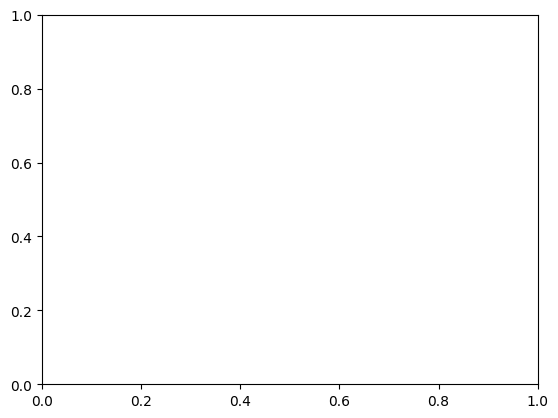

In [89]:
plt.plot(range(2,20), silhouette_scores)
plt.xlabel('k')
plt.ylabel('silhouette_scores')
plt.show()

Mayor silhouette scores con K=2

In [ ]:
# guarda las inercias del model con un list comprehension

[35812.3682008368,
 11137.736723639344,
 7254.022835331666,
 5691.624714323987,
 4805.423332643921,
 4233.709967967664,
 3775.656021891465,
 3312.1846473093838,
 2984.567361368435,
 2841.8155485330253,
 2612.052327151954,
 2412.0829271158,
 2268.5109140505783,
 2155.6868408166806,
 2029.3145660247746,
 1933.1812127609683,
 1849.004377871369,
 1788.8727950596997,
 1695.3879260828553]

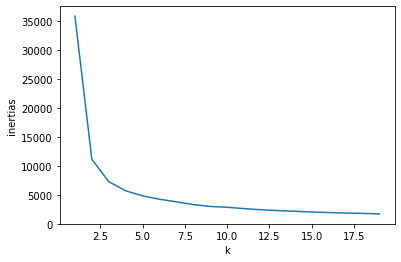

In [36]:
plt.plot(range(1,20), inertias)
plt.xlabel('k')
plt.ylabel('inertias')
plt.show()

Con el Elbow method comprobamos que k=2 sería la opción más adecuada

In [ ]:
# instancia un nuevo KMeans con n_clusters=2 y random_state=42

# entrena el modelo

# comprueba los labels_

array([0, 0, 1, ..., 0, 1, 0])

#### Muestra en un gráfico de tartas la distribución de los distintos clusters

In [ ]:
# crea un dataframe .labels_ del modelo anterior

,Cluster
0,0
1,0
2,1
3,0
4,0


In [ ]:
# El favorito de Joselu

<AxesSubplot:ylabel='Cluster'>

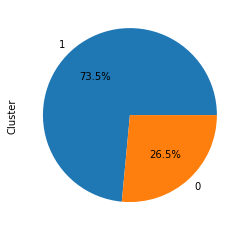

In [49]:
df_clusters['Cluster'].value_counts().plot.pie(autopct="%.1f%%")